# WS 13 Kreuzvalidierung

* vergleichen Sie alle bisher bekannten Klassifikatoren (ausser SVC und MLPClassifier) in Bezug auf deren Stabilität unter Anwendung von Kreuzvalidierung
* verwenden Sie für die Klassifikatoren jeweils Default-Parametrisierung
* setzen Sie für die Kreuzvalidierung folgende Funktion ein: `sklearn.model_selection.cross_val_score`

In [3]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## load data
datapath = '../../3_data'
from os import chdir; chdir(datapath)
bank_df = pd.read_csv('bank_data_prep.csv')

## features - target - tplit
X = bank_df.drop('y', axis=1)
y = bank_df['y']

## train - test - split
## obsolete here, is done internally by cross validation

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier(),
    CatBoostClassifier(logging_level='Silent'), ## optional
    LGBMClassifier(), ## optional
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB(),
    LogisticRegression()
]

kfold = 5
model_names = []
model_scores = []

for model in models:
    model_name = model.__class__.__name__
    print(model_name)
    scores = cross_val_score(model, X, y, cv=kfold, n_jobs=-1)
    for i in range(len(scores)):
        model_scores.append(scores[i])
        model_names.append(model_name)

KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
HistGradientBoostingClassifier
CatBoostClassifier
LGBMClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
GaussianNB
LogisticRegression


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


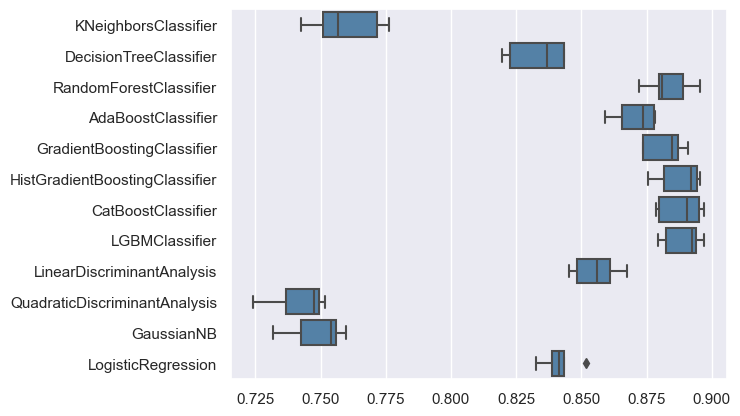

In [5]:
## manage results, e.g. in pandas dataframe
res_df = pd.DataFrame({
    'names' : model_names,
    'scores' : model_scores
})

## visualize results
sns.boxplot(x=model_scores, y=model_names, color='steelblue');

**Fazit:**
* am besten sind die Ensemble Methoden
* die Stabilität ist bei allen in derselben Grössenordnung